# Exploratory Data Analysis

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 데이터셋 미리보기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv('../data/diabetes.csv')
df.shape

(768, 9)

In [3]:
# 위에서부터 5개만 미리보기

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보를 본다

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치를 봅니다

df_null = df.isnull()
df_null

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
# 결측치 갯수를 알 수 있음

df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 수치데이터에 대한 요약

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- max값이 커서 mean이 중위값(50%)보다 크다
- Pregnancies ~ BMI 전부 다 min == 0
- 하지만 Glucose의 일사분위값(25%)가 99인데 min이 0이라는 것은 아마 결측치가 아닐까
- BloodPressure, Skin Thickness, BMI도 0이 될 수 없는데 min이 0이라는 것은 아마 결측치이지 않을까

In [8]:
# 가장 마지막에 있는 Outcome은 label 값이기 때문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들어 준다.
# feature_columns라는 변수에 담는다.

feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화

값을 요약해보면 최솟값이 0으로 나오는 값들이 있음.

0이 나올 수 있는 것도 있지만 인슐린이나 혈압 등의 값은 0이 나올 수 없는 값이기 때문에 결측치라고 볼 수 있음.

따라서 0인 값을 결측치로 처리하고 시각화 해보기

In [9]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
# 결측치 여부를 나타내는 데이터프레임을 만든다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 칼럼에 대해 결측치 여부를 구해서 df_null이라는 데이터프레임에 담는다.

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

앞에서 생성한 Decision Tree에서 Insulin이 당뇨병에 그닥 큰 영향이 없었던 이유가 결측치 때문이라고 볼 수 있음.

In [11]:
# 결측치 비율

df_null.mean()*100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

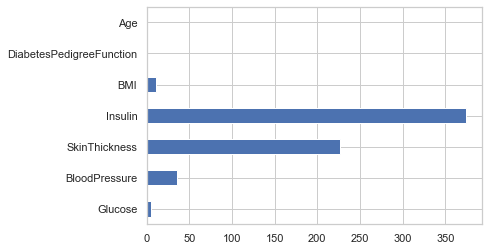

In [12]:
# 결측치 갯수를 막대그래프로 시각화

df_null.sum().plot.barh()

<AxesSubplot:>

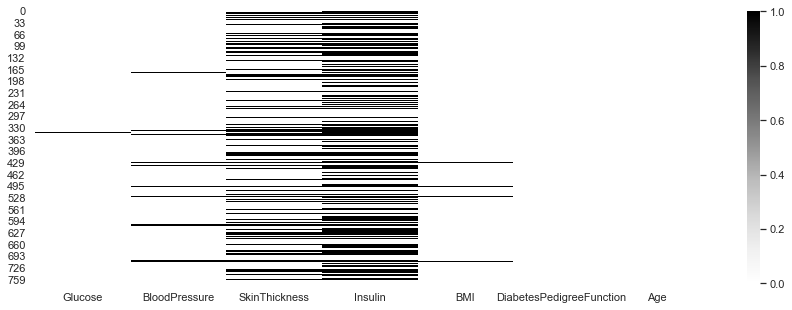

In [13]:
# 결측치를 heatmap으로 시각화

plt.figure(figsize=(15,5))
sns.heatmap(df_null, cmap='Greys')

1 = 결측치 = True

0 = 결측치X = False

# 정답값

- target, label 이라고 부르기도 한다.

In [14]:
# 정답값인 Outcome의 갯수

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0: 당뇨병 발병 X

1: 당뇨병 발병 O

In [15]:
# 정답값인 Outcome의 비율

df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [16]:
# 다른 변수와 함께 보기
# 임신횟수와 정답값을 비교해보기
# "Pregnancies"를 groupby로 그룹화 하여 Outcome에 대한 비율을 구한다.
# 결과를 df_po라는 변수에 저장

df.groupby(["Pregnancies"])["Outcome"].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

임신 횟수가 늘어갈수록 당뇨병 발병 확률이 올라간다.

In [17]:
# 발병비율과 평균값을 함게 본다.
# 여러 인자를 넣어줄 때 aggregation 함수를 사용한다.
# 인덱스로 지정되어 있던 Pregnancies를 reset_index()를 사용해 컬럼값으로 변경시켜준다.

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

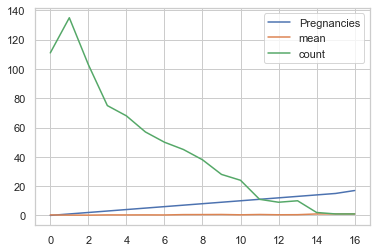

In [18]:
# 임신횟수에 따른 당뇨병 발병 비율 시각화

df_po.plot()

서로 수의 단위가 너무 달라서 같이 표현하기엔 적합하지 않음.

<AxesSubplot:>

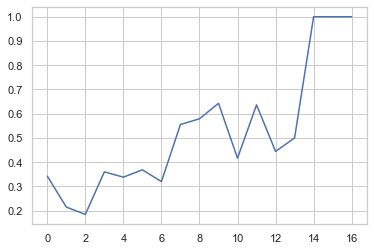

In [19]:
df_po["mean"].plot()

<AxesSubplot:>

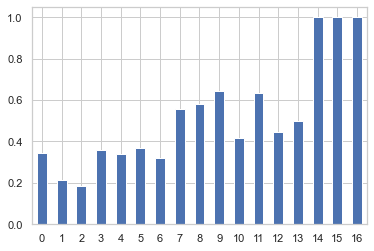

In [20]:
df_po["mean"].plot.bar(rot=0)

# countplot

- 변수가 하나인 categorical한 범주형 데이터를 시각화 할 때

<AxesSubplot:xlabel='Outcome', ylabel='count'>

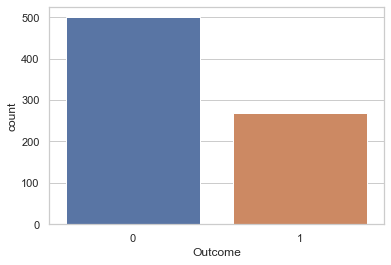

In [21]:
# 위에서 구했던 당뇨병 발병 비율을 구해본다.
# 당뇨병 발병 빈도수를 비교한다.

sns.countplot(data=df, x="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

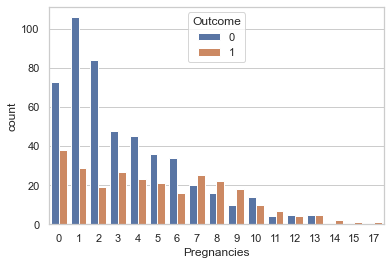

In [22]:
# 임신횟수에 따른 당뇨병 발병 빈도수를 비교한다.
# hue: Outcome 값에 따라서 색상이 다르게 나오게 한다. Outcome값이 비교 기준이 됨

sns.countplot(data=df, x="Pregnancies", hue="Outcome")

Pregnancies가 증가할수록 조건이 많아지기 때문에 case가 적은 건에 대해서는 overfitting이 발생할 수 있음.

이럴 경우엔 범주화 해서 표현 하기도 함. ==> one-hot encoding

ex) 특정 임신 횟수를 기준으로 이상/이하로 나눈다

In [23]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만든다.
# 0~6: False, 7~: True

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

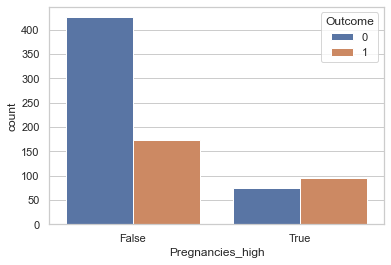

In [24]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현한다.

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

# barplot

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

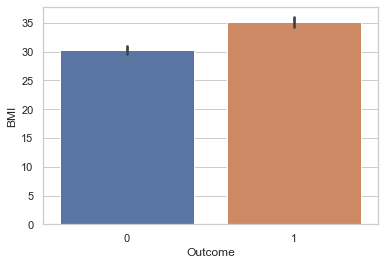

In [25]:
# 당뇨병 발병에 따른 BMI 수치 비교

sns.barplot(data=df, x="Outcome", y="BMI")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

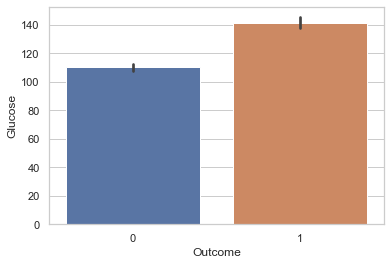

In [26]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치 비교

sns.barplot(data=df, x="Outcome", y="Glucose")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

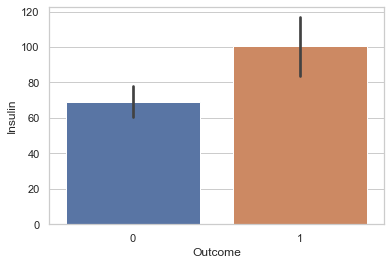

In [27]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병 비교

sns.barplot(data=df, x="Outcome", y="Insulin")

y축: 평균값

barplot 중간에 검은색 막대(bootstrap): 데이터 일부를 샘플링 해서 그 데이터의 95%의 신뢰구간(ci=95)

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

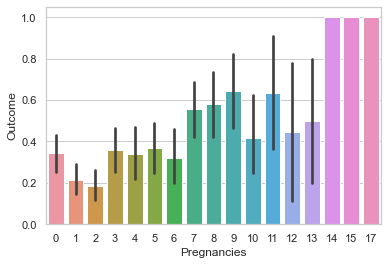

In [28]:
# 임신횟수에 대해 당뇨병 발병 비율 비교

sns.barplot(data=df, x="Pregnancies", y="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

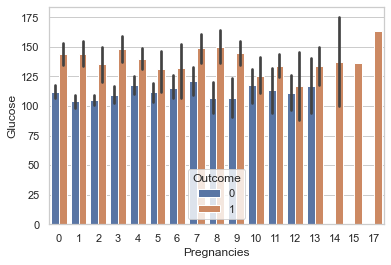

In [29]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose) 수치를 당뇨병 발병여부(Outcome)에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

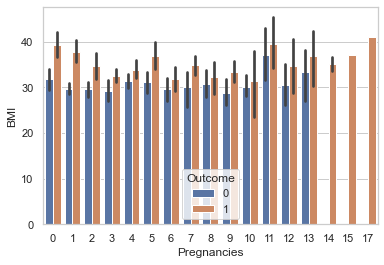

In [30]:
# 임신 횟수(Pregnancies)에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

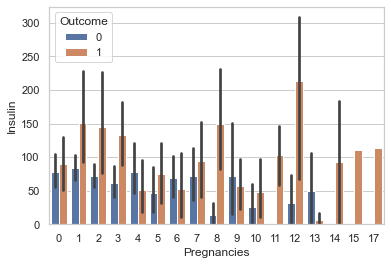

In [31]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화

sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

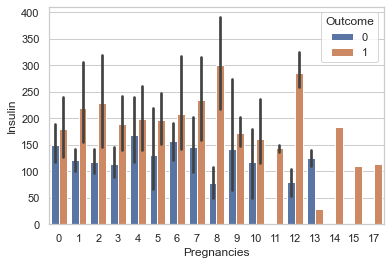

In [32]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다.

sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

당뇨병이 발병하는 사람들(Outcome=1)의 인슐린 수치의 신뢰구간이 차이가 많이 남

발병하지 않는 사람들(Outcome=0)은 확연하게 인슐린 수치가 낮다.

# boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

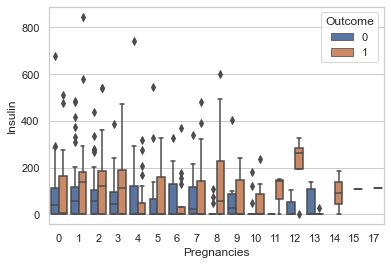

In [33]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화

sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

boxplot은 1사분위와 3사분위 값의 범위를 나타냄

현재 이 그래프에서는

1사분위와 3사분위 값의 차이가 크고, 최솟값과 최대값 차이도 큼
boxplot이 아래로 주저앉아있는 이유: 인슐린 값이 0인 값이 많아서

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

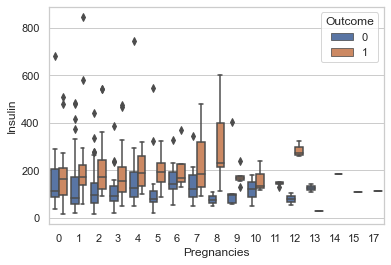

In [34]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다.

sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

당뇨병 발병 하는 사람들이 대체적으로 인슐린 수치가 높고
임신횟수가 늘어갈수록 수치의 차이가 크다

# violinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

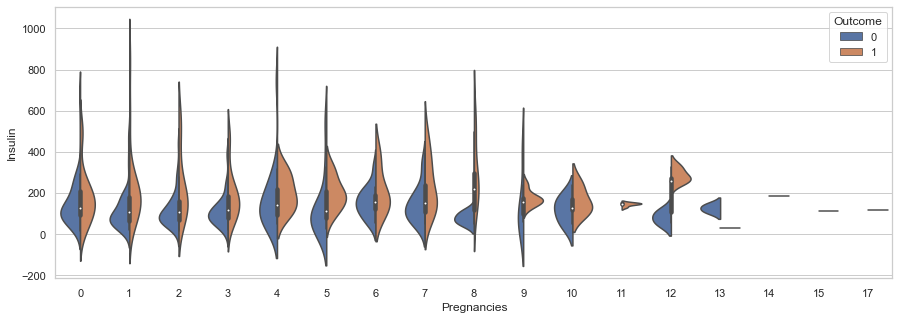

In [35]:
# 위의 그래프를 violinplot으로 시각화 한다.
# boxplot을 좀 더 자세히 표현 // boxplot은 상자 안을 자세히 알 수 없다.
# split=True : Outcome에 따라 그래프를 두 개로 나눈다

plt.figure(figsize=(15,5))
sns.violinplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

# swarmplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

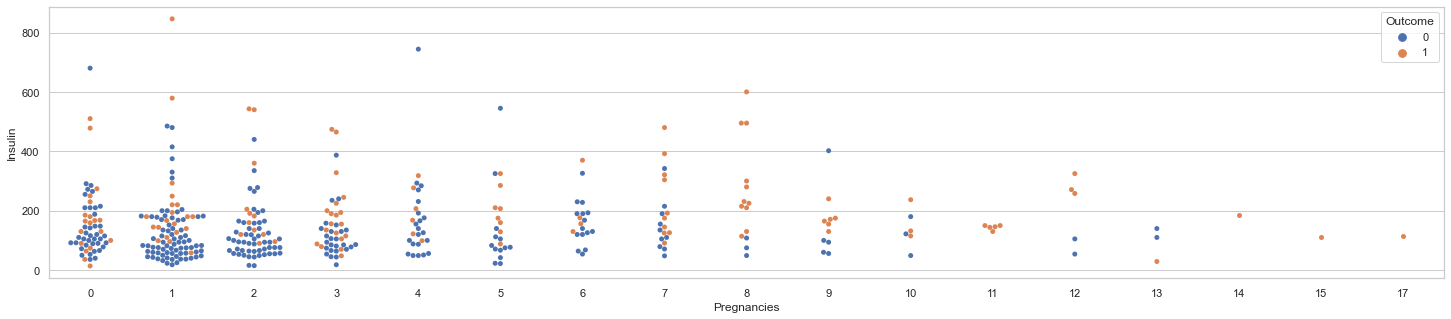

In [36]:
# 위의 그래프를 swarmplot으로 시각화
# 임신횟수가 증가할수록 데이터의 갯수가 줄어든다는 사실을 알 수 있음

plt.figure(figsize=(25,5))
sns.swarmplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

# distplot

- 연속된 수치형 데이터를 시각화 할 때 사용
- 히스토그램과 밀도추정곡선을 나타냄
- 범주형 컬럼으로 만들어주고싶을 때, 어떤 값을 기준으로 나누는게 좋을지 알 수 있음


- a: 판다스의 시리즈 형태
- bins: 히스토그램의 막대 갯수
- hist, kde: histogram, kde를 표현 할 건지
- rug: 데이터의 빈도를 표시 할건지

In [37]:
# 당뇨병이 발병하지 않은 케이스만 모아서 subset을 만든다

df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]

df_0.shape, df_1.shape

((500, 10), (268, 10))

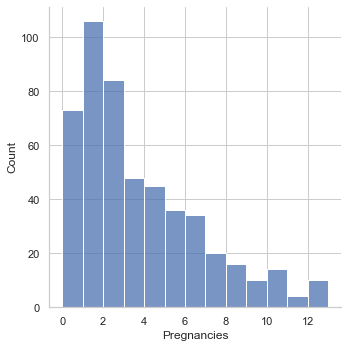

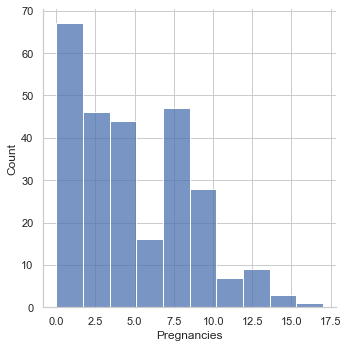

In [38]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화

sns.displot(df_0["Pregnancies"])
sns.displot(df_1["Pregnancies"])

- Pregnancies가 5 미만인 경우, 당뇨병 발병 확률이 발병하지 않을 확률보다 적어짐
- Pregnancies가 5 이상인 경우, 당뇨병 발병 확률이 발병하지 않을 확률보다 높아짐

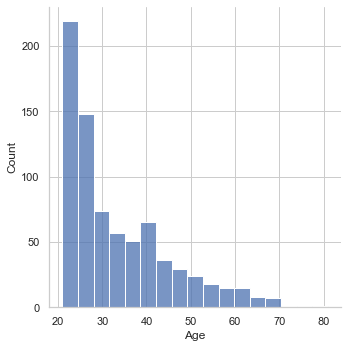

In [39]:
# 나이에 따른 당뇨병 발병 여부를 시각화

sns.displot(df["Age"])

- 나이가 많은 케이스 보다는 20~30대에 발병 확률이 높음

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Fu

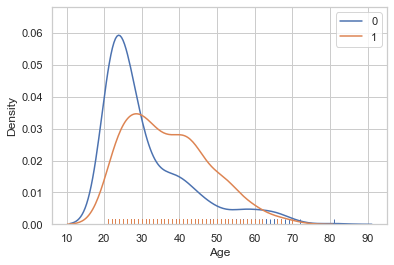

In [40]:
# 여기서 hist=False 옵션을 주면, 선 그래프만 남게 된다.
# rug=True 하게 되면 데이터의 빈도를 표시

sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
sns.distplot(df_1["Age"], hist=False, rug=True, label="1")
plt.legend()

- 20~30대: 당뇨병 발병 확률 > 발병하지 않을 확률
- 30~: 당뇨병 발병 확률 < 발병하지 않을 확률

# Subplots

## Pandas를 통한 histplot 그리기

- pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려준다.

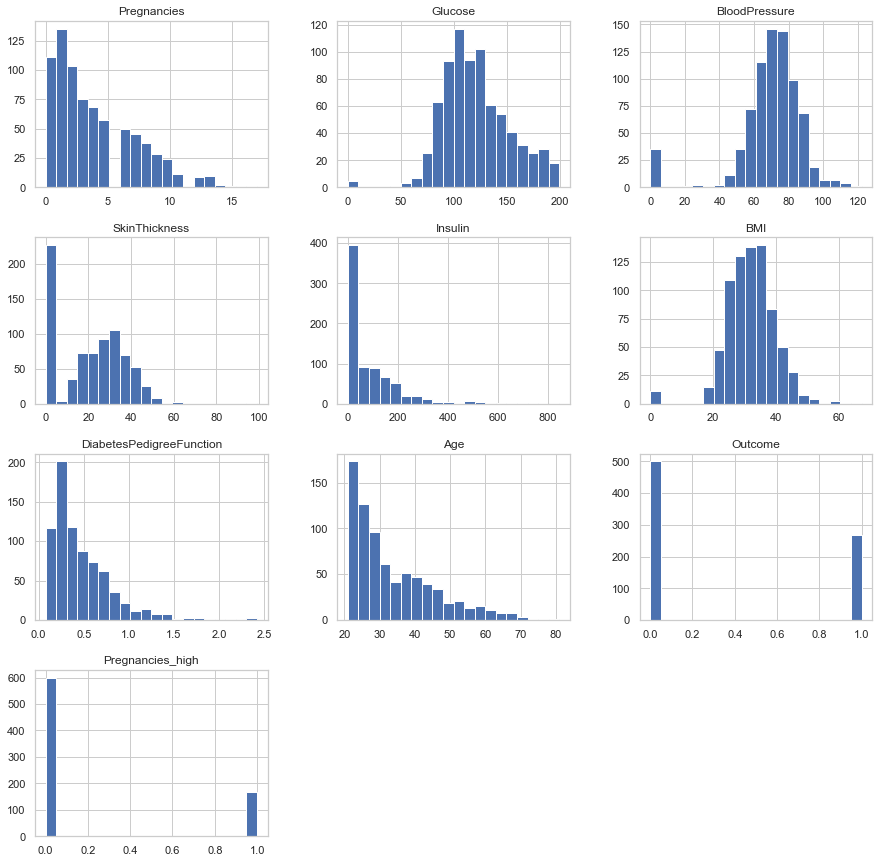

In [41]:
# Pregnanciees_high 컬럼의 값이 Boolean값이기 때문에 int로 타입을 전환 후 histogram을 그린다.
# bins로 막대 갯수를 조정할 수 있다.
# y축 = 빈도수

df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)

h = df.hist(figsize=(15,15), bins=20)

# 반복문을 통한 서브플롯 그리기

## distplot

In [42]:
# 컬럼의 수 만큼 for문을 만들어서 서브플롯으로 시각화

col_num = df.columns.shape
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

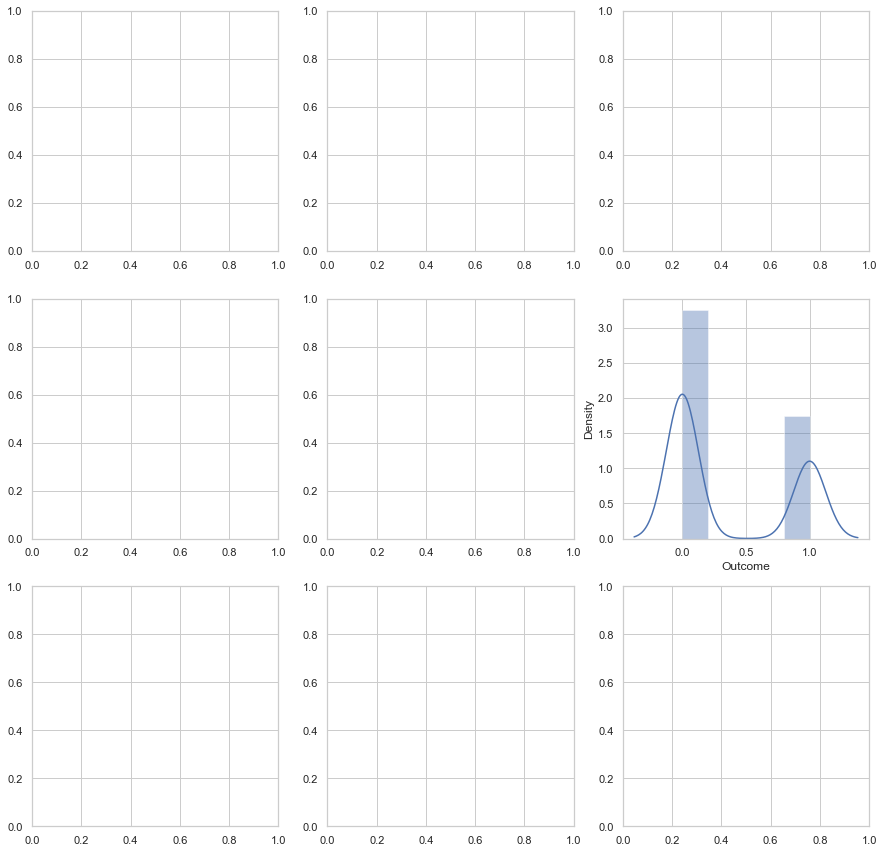

In [43]:
# distplot으로 서브플롯을 그린다.
# ax=axes[][]로 그래프 위치 지정

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

sns.distplot(df["Outcome"], ax=axes[1][2])

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1


/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

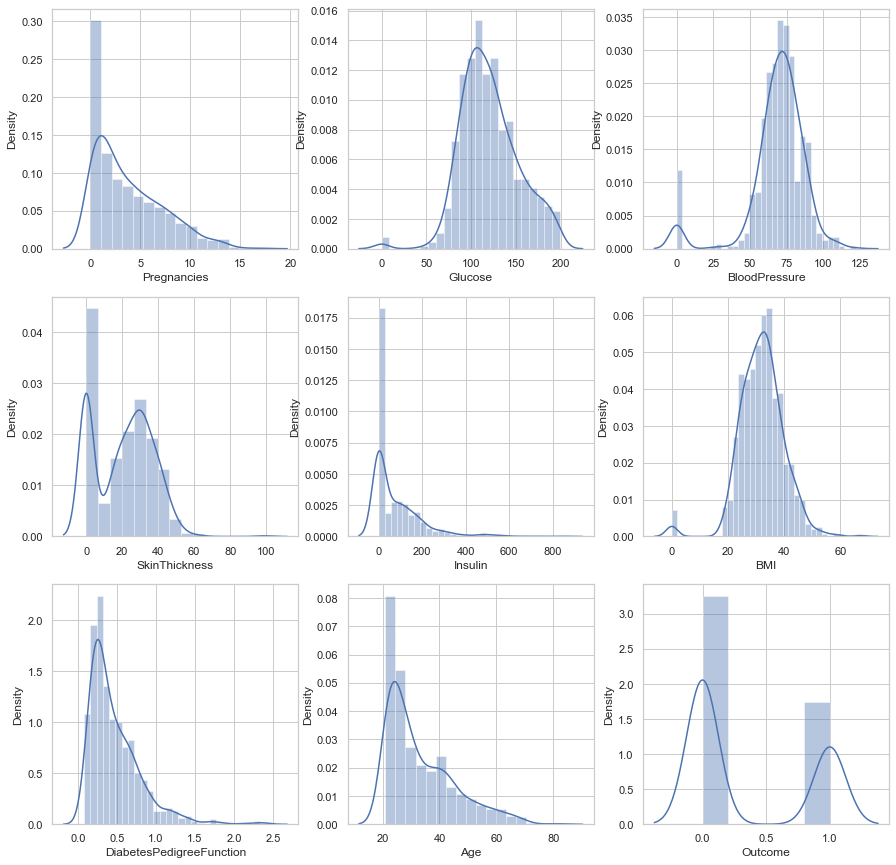

In [44]:
# y축 = 적분했을 때 총 합이 1이 되는 값
# 밀도함수 곡선도 있음
# enumerate는 반복 횟수와 컬럼 이름을 같이 반환
# //: 나눗셈 결과에서 소수점을 제외
# %: 나머지 값

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

In [45]:
df_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
1,1,85,66,29,0,26.6,0.351,31,0,False
3,1,89,66,23,94,28.1,0.167,21,0,False
5,5,116,74,0,0,25.6,0.201,30,0,False
7,10,115,0,0,0,35.3,0.134,29,0,True
10,4,110,92,0,0,37.6,0.191,30,0,False
...,...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0,True
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,False
765,5,121,72,23,112,26.2,0.245,30,0,False


/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

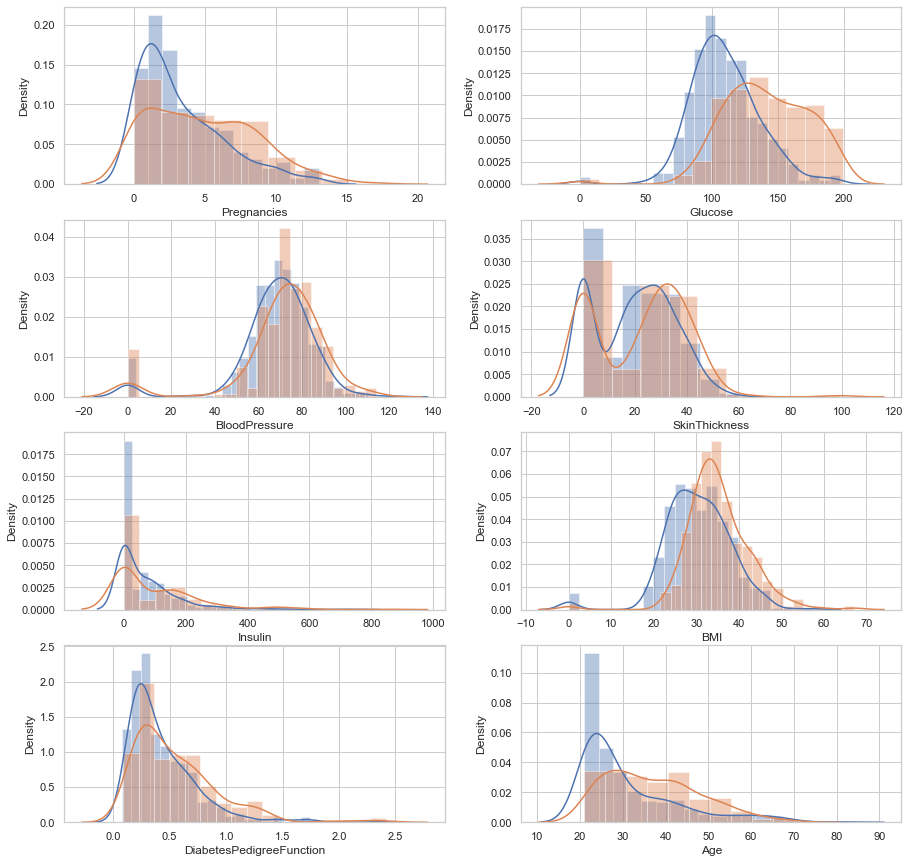

In [46]:
# 모든 변수에 대한 distplot을 그린다.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
#     print(i, col_name, row, col)
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

## violinplot

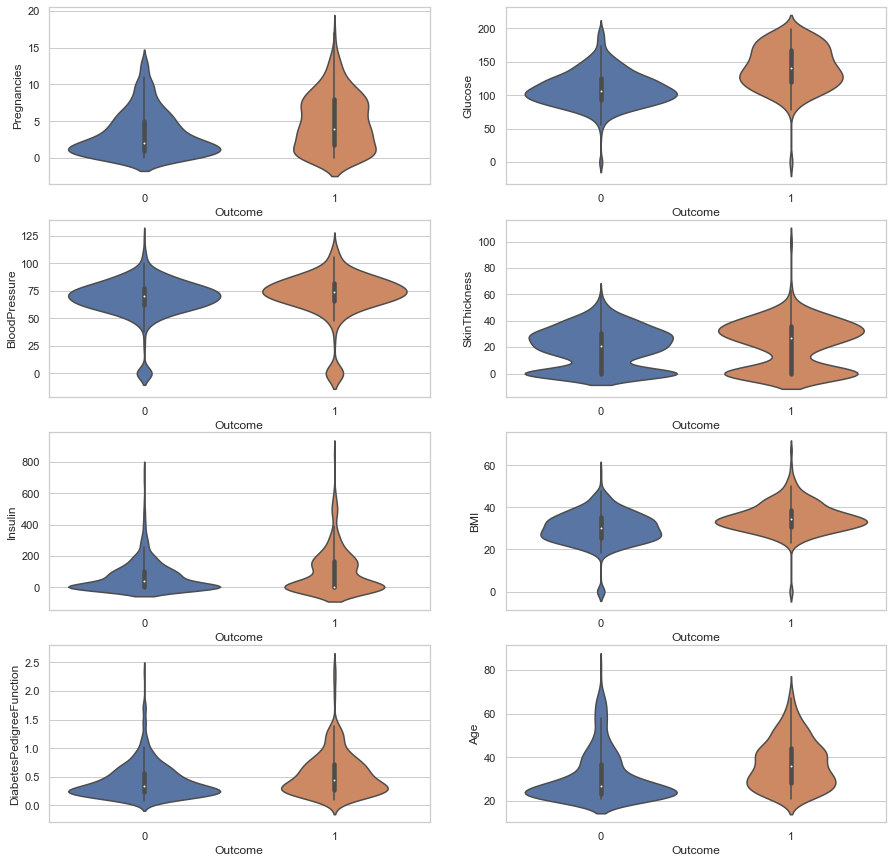

In [47]:
# violinplot으로 서브플롯 그리기

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
#     print(i, col_name, row, col)
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

SkinThickness, BMI와 같이 0이 나올 수 없는 값인데 0에 값이 있는 것 -> 결측치

## Implot

- 상관계수가 높을 것 같은 두 변수에 대해 시각화 합니다.

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

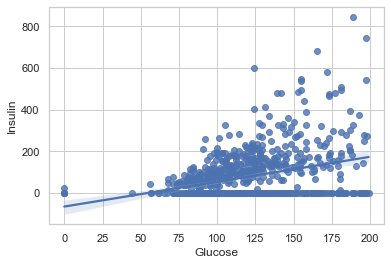

In [48]:
# Glucose와 Insuline을 Outcome으로 구분하기

sns.regplot(data=df, x="Glucose", y="Insulin")

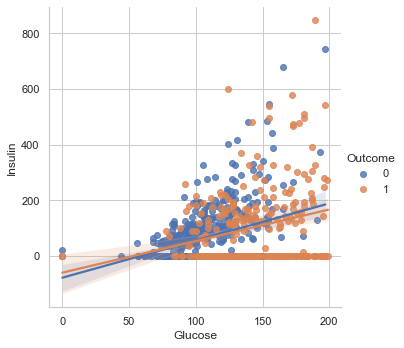

In [49]:
# hue="Outcome"을 지정해서 Outcome을 기준으로 한 결과를 보고싶으면 regplot이 아닌 lmplot을 사용
# regplot은 다른 색상을 지원하지 않음

sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

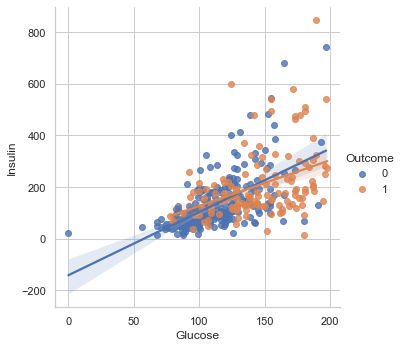

In [50]:
# Insulin 수치가 0 이상인 데이터로만 그리기

sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

## pairplot

- 전체적인 수치데이터에 대한 분포를 볼 때 사용
- 변수간의 상관관계 등을 파악하기 좋음

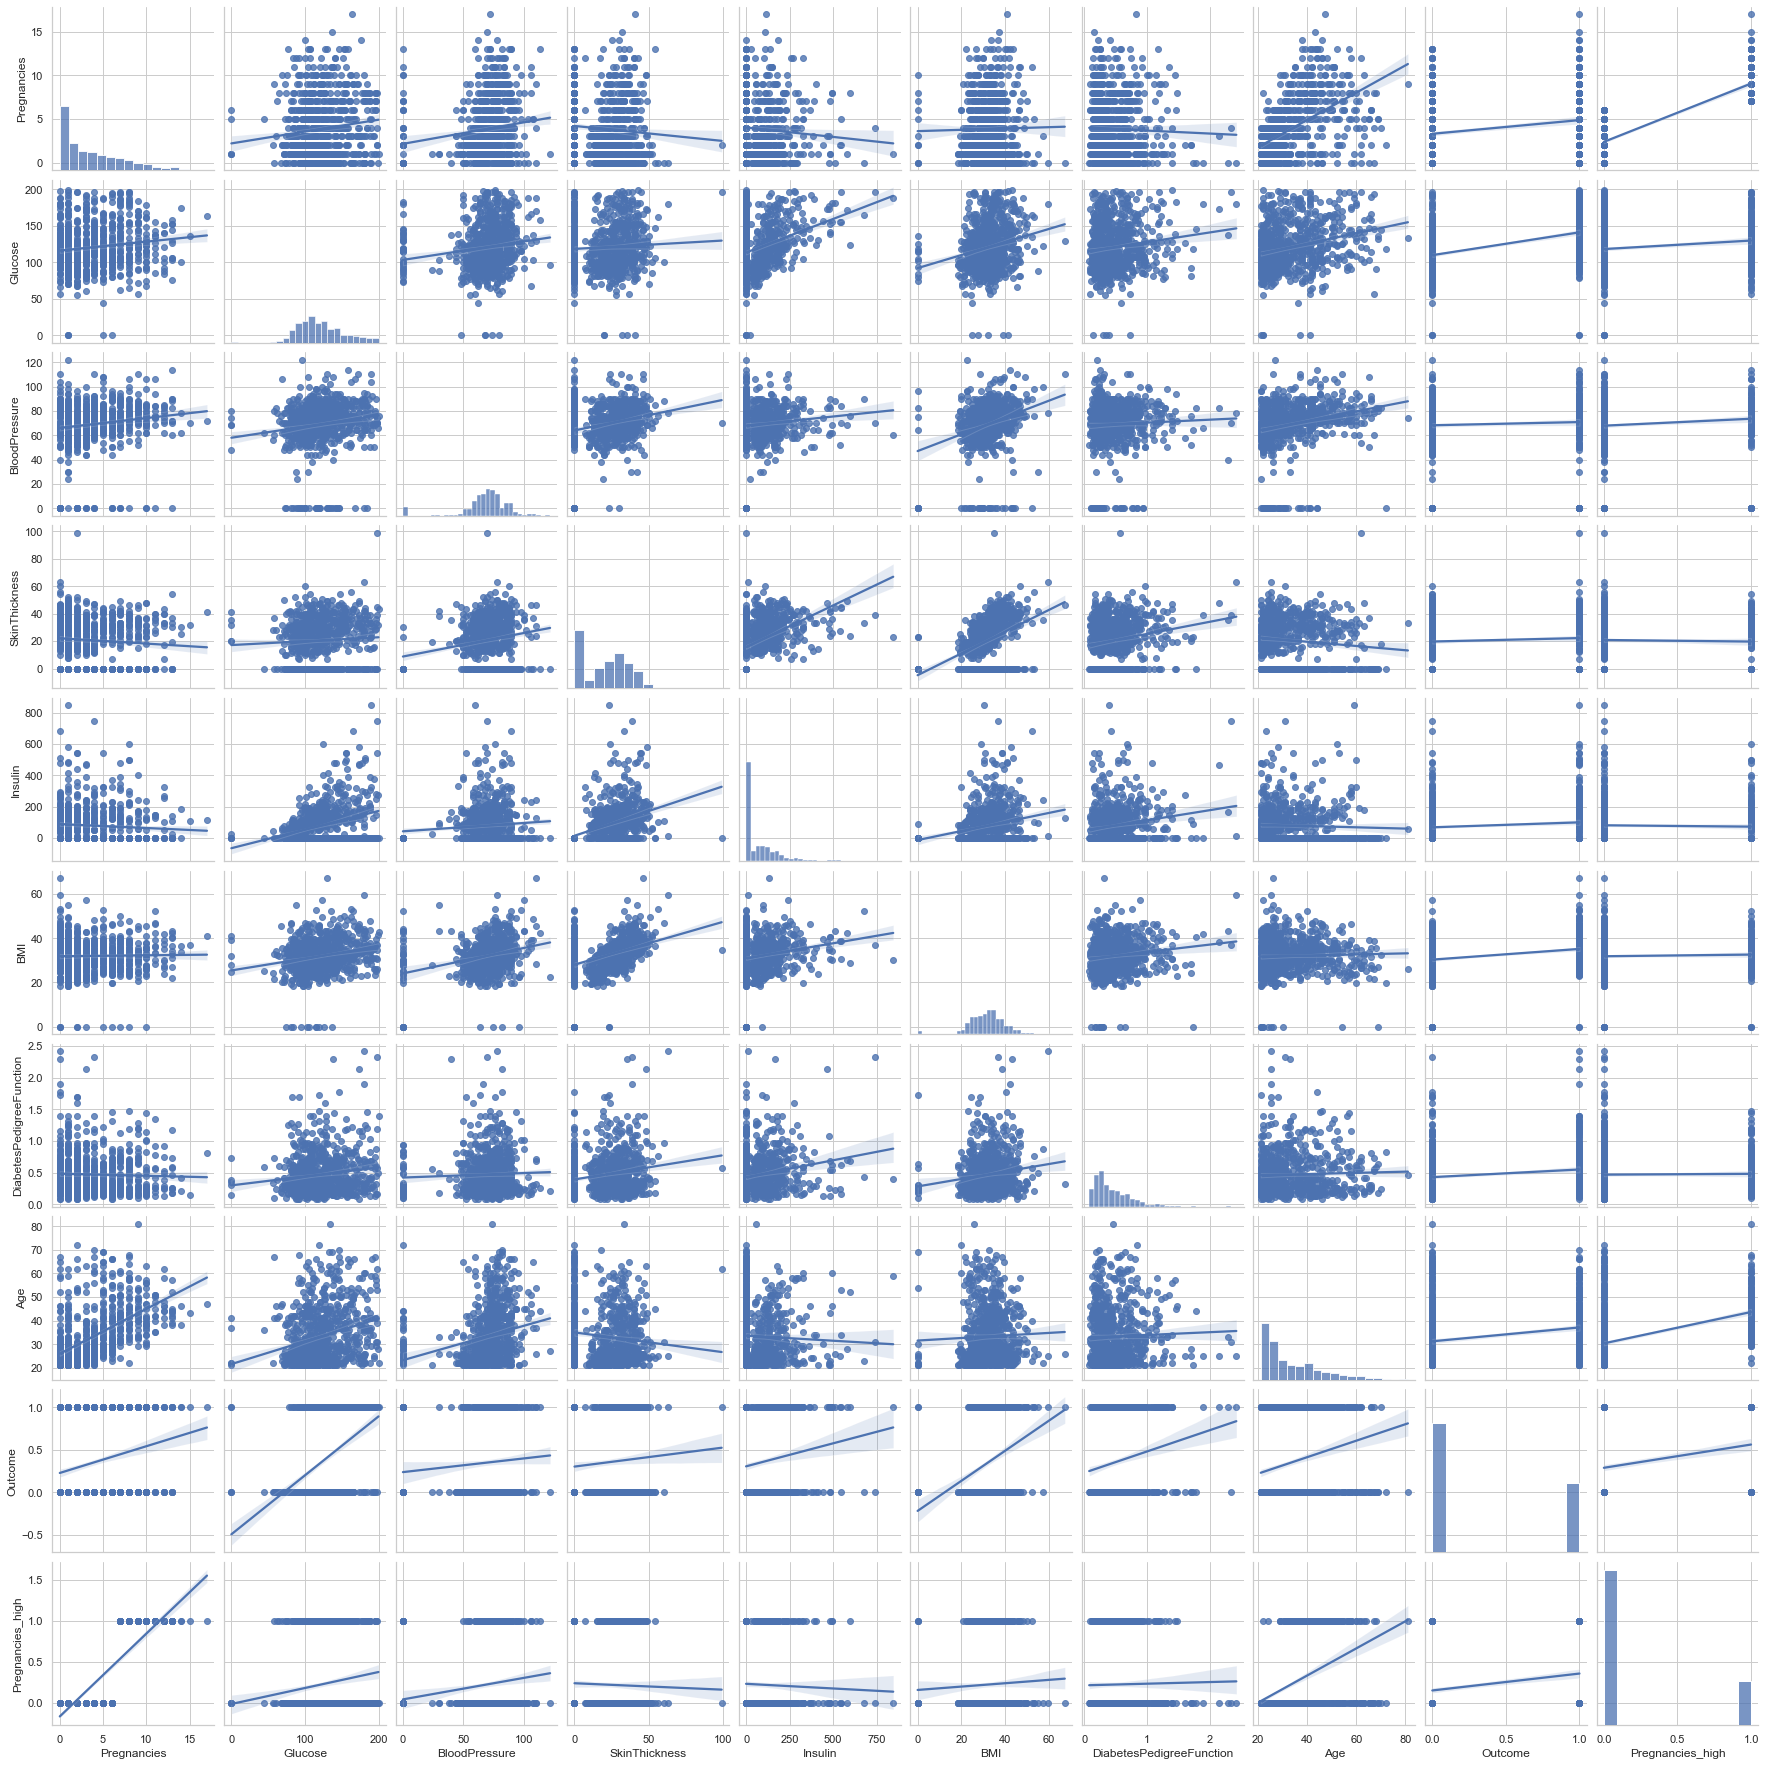

In [51]:
# 모든 변수에 대해 plot을 그림
# 기본적으로 kind='scatter'로 되어 있음. 다른 그래프도 그릴 수 있다

sns.pairplot(df, kind="reg")

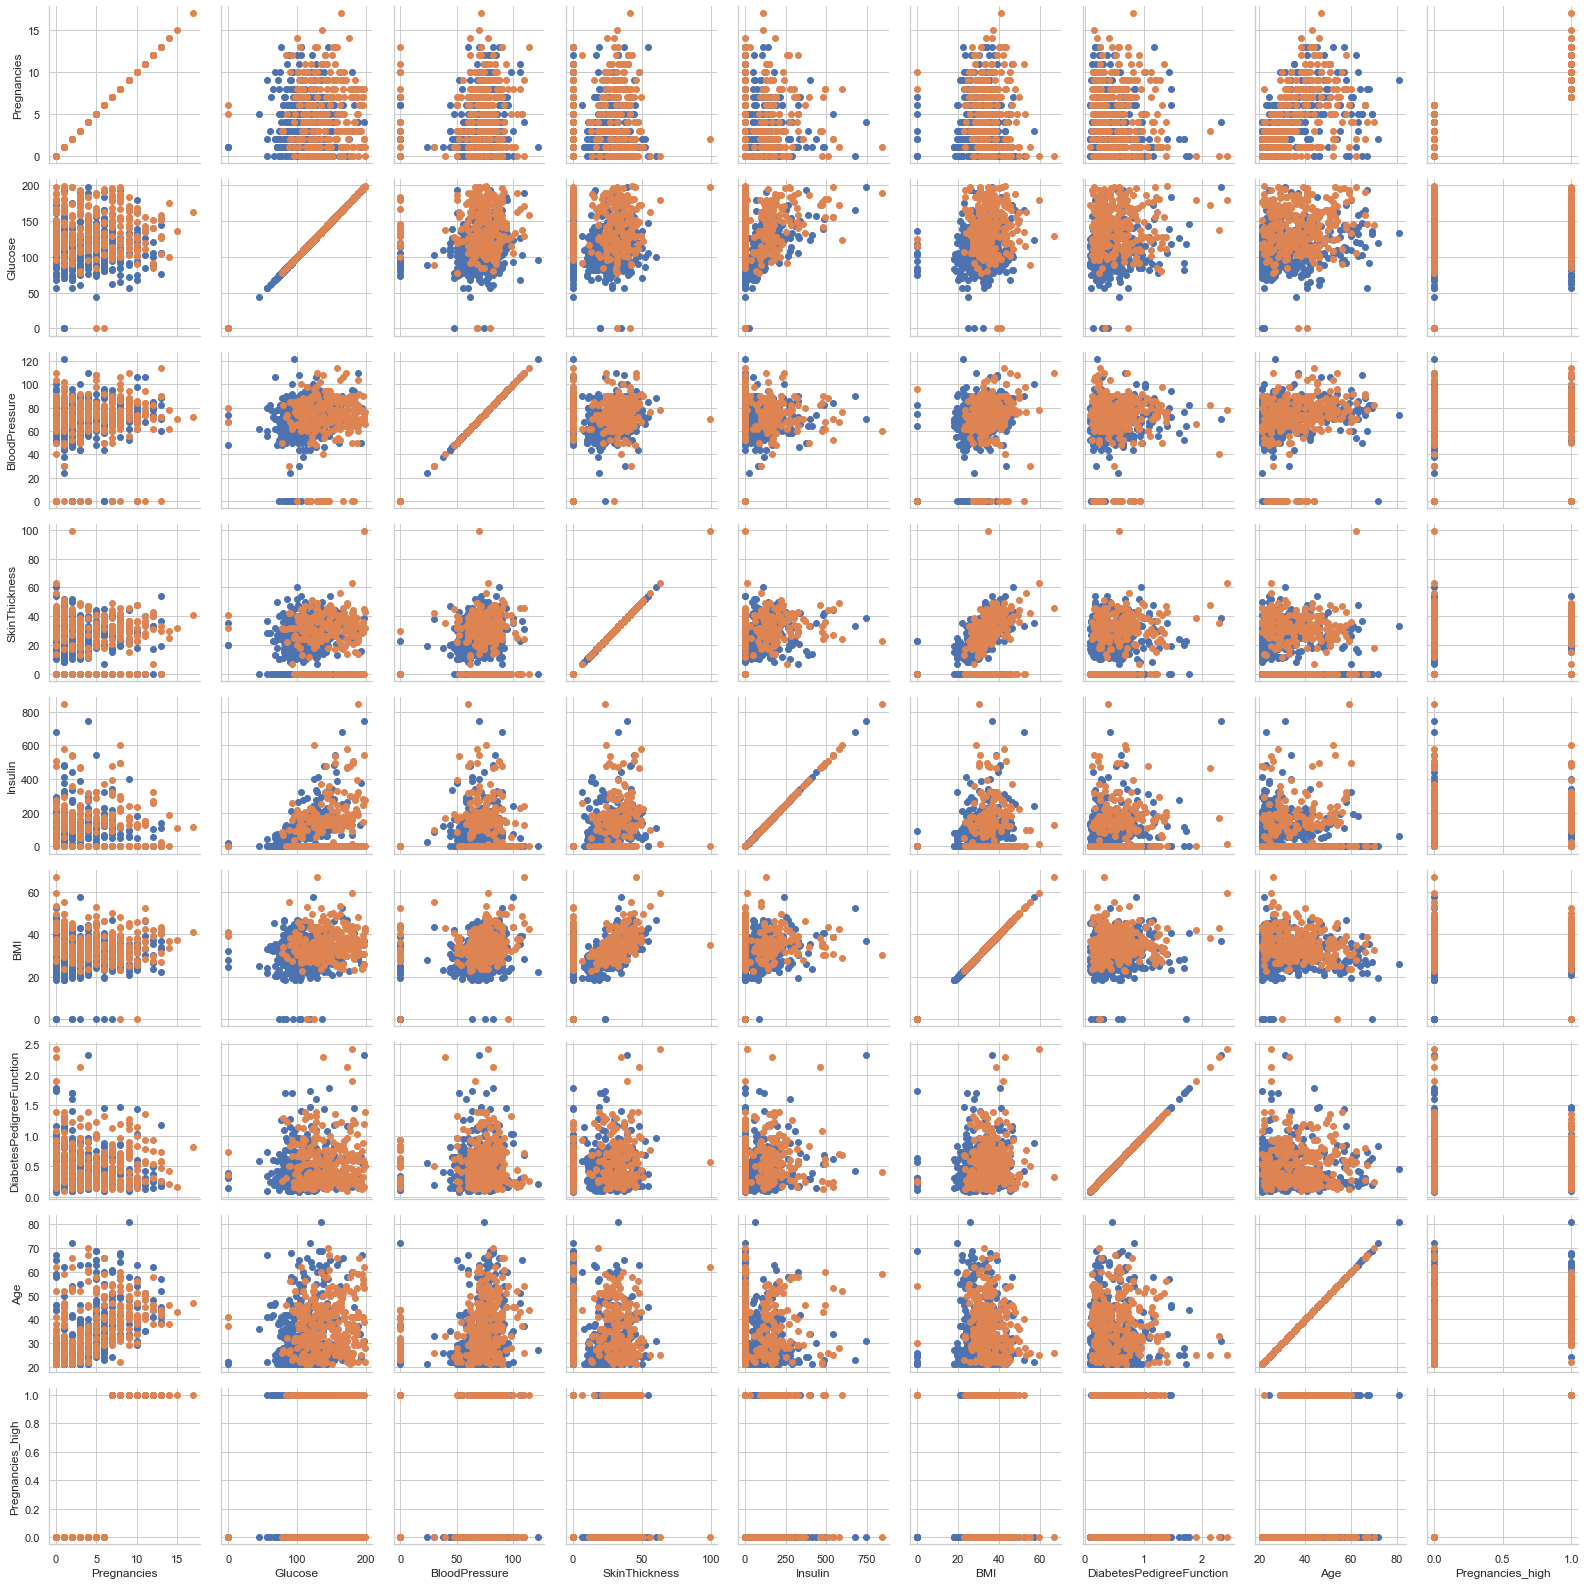

In [52]:
# PairGrid를 통해 모든 변수에 대해 Outcome에 따른 scatterplot을 그린다.

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

# 상관 분석 (Correlation analysis)

- https://ko.wikipedia.org/wiki/상관_분석
- 상관 분석: 두 변수간에 어떤 선형적/비선형적 관계를 갖고 있는지를 분석하는 방법
- 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며, 이 때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라고 한다.
- 상관 계수(Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐, 인과관계를 설명하는 것은 아님.
- 두 변수간에 인과관계에 대한 것은 회귀분석을 통해 알 수 있다.


- -1.0 < r < -0.7 : 강한 음적 선형관계
- -0.7 < r < -0.3 : 뚜렷한 음적 선형관계
- -0.3 < r < -0.1 : 약한 음적 선형관계
- -0.1 < r < +0.1 : 거의 무시될 수 있는 선형관계
- +1.0 < r < +0.3 : 약한 양적 선형관계
- +0.3 < r < +0.7 : 뚜렷한 양적 선형관계
- +0.7 < r < +1.0 : 강한 양적 선형관계

In [53]:
# Pregnancies ~ Age 와 Outcome행만 본다 (Pregnancies_high 제외)
# 0인 결측치는 nan으로

df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [54]:
# 정답 값인 Outcome을 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만들어 준다.
# 상관계수를 구한다.

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

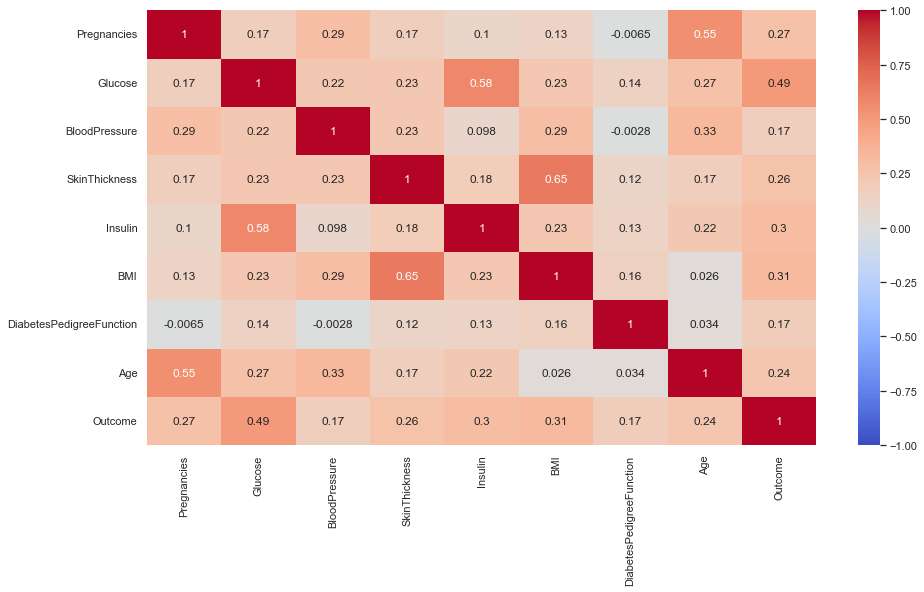

In [55]:
# 위에서 구한 상관계수를 heatmap으로 시각화 한다.
# -1 ~ +1 사이로 보기

plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [56]:
# Outcome 수치에 대한 상관계수만 모아서 본다.

df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

# 상관계수가 높은 변수끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

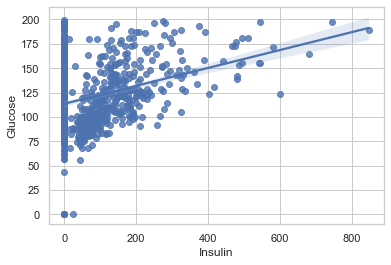

In [57]:
# Insulin 과 Glucose로 regplot 그리기

sns.regplot(data=df, x="Insulin", y="Glucose")

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

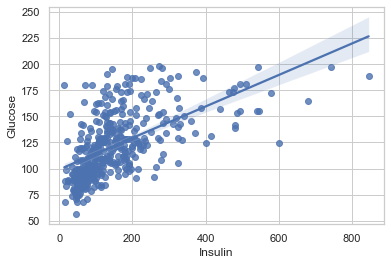

In [58]:
# df_0으로 결측치를 처리한 데이터프레임으로 Insulin과 Glucose의 regplot 그리기

sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

- 회귀선의 기울기가 1에 가까울수록 상관관계가 높다.
- 인슐린이 높은 곳에 Outlier들이 발견된다.

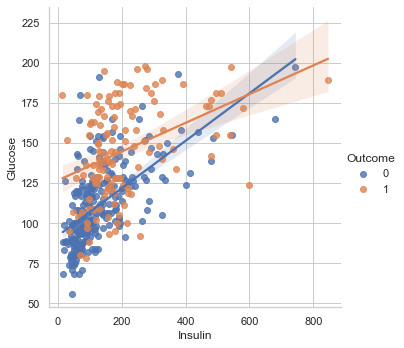

In [59]:
sns.lmplot(data=df_matrix, x="Insulin", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

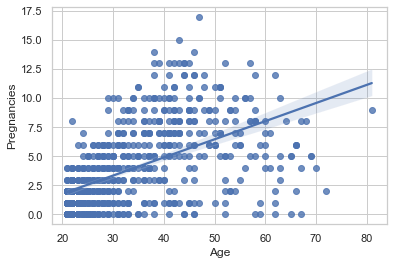

In [60]:
# 결측치를 처리한 데이터로 할지, 원래 데이터로 할지 정해야 함
# Age와 Pregnancies로 regplot 그리기

sns.regplot(data=df, x="Age", y="Pregnancies")

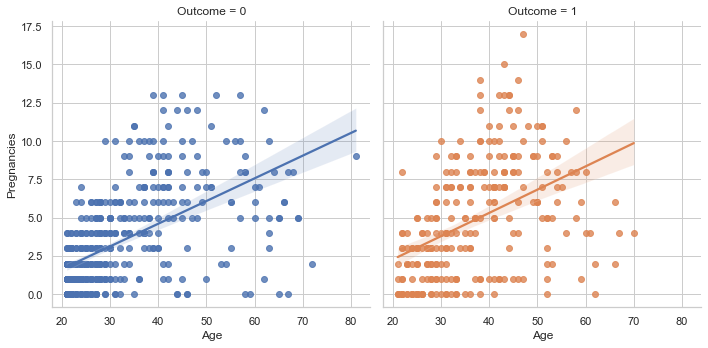

In [61]:
# Age 와 Pregnanciesfh lmplot을 그리고 Outcome에 따라 다른 색상으로 나타내기
# Outcome값에 따라 다른 그래프에 표시하고싶은 경우, col="Outcome"

sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")